In [1]:
from riiid_education.predict import load_lgbm, load_xgboost, load_question_features
import shap
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')

Here we aim to glean some insights about knowledge tracing from our trained models.

In [2]:
m_lgbm = load_lgbm("models2/main_model_lgbm.b")

In [3]:
m_xgb = load_xgboost("models2/main_model_xgb.b")

In [4]:
question_features = load_question_features("models2/question_features.csv")

In [5]:
val_df = pd.read_csv("models2/bkp_extra_features/main_model_val.csv")

#### SHAP values from the gradient boosted trees

In [13]:
exp_lgbm = shap.TreeExplainer(m_lgbm)

In [14]:
X = val_df[m_lgbm.feature_name()].sample(n=5000)

In [20]:
exp_lgbm.model.original_model.params['objective'] = 'binary'

In [21]:
shap_lgbm = exp_lgbm.shap_values(X, tree_limit=200)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


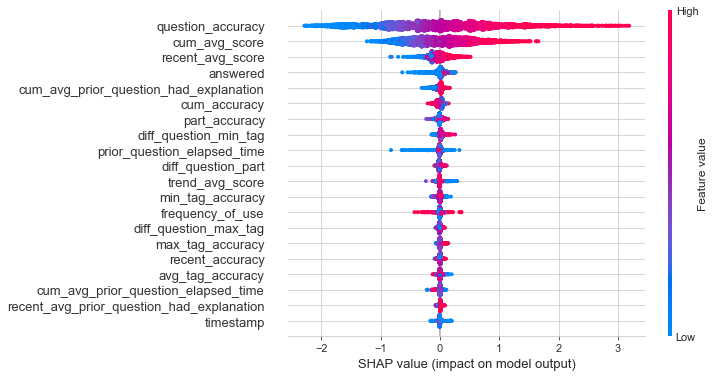

In [31]:
shap.summary_plot(shap_lgbm[1], X, plot_size=(8, 6))

In [26]:
exp_xgb = shap.TreeExplainer(m_xgb)

In [27]:
shap_xgb = exp_xgb.shap_values(X, tree_limit=200)

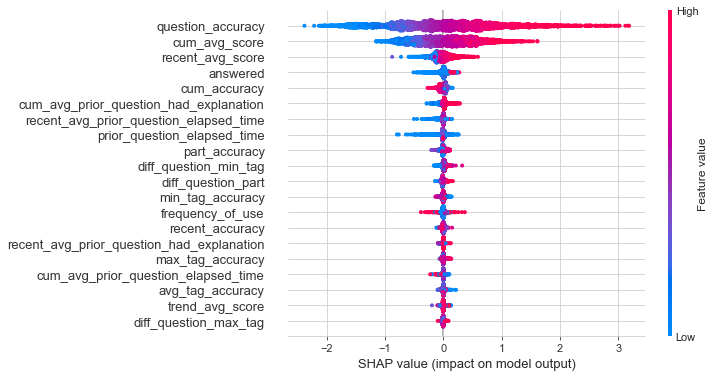

In [28]:
shap.summary_plot(shap_xgb, X, plot_size=(8, 6))

#### Question features distributions

<AxesSubplot:xlabel='question_accuracy', ylabel='Count'>

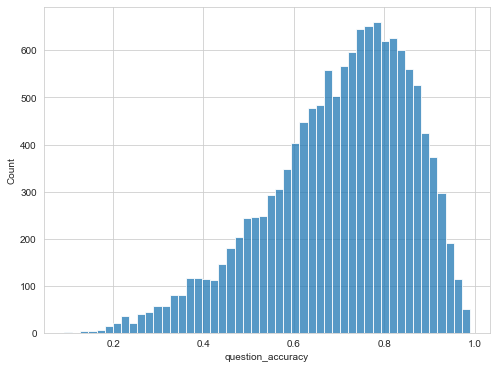

In [20]:
sns.histplot(question_features["question_accuracy"])

<AxesSubplot:xlabel='part_accuracy', ylabel='Count'>

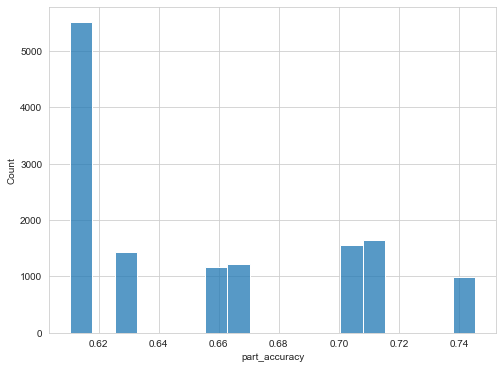

In [21]:
sns.histplot(question_features["part_accuracy"])

<AxesSubplot:xlabel='avg_tag_accuracy', ylabel='Count'>

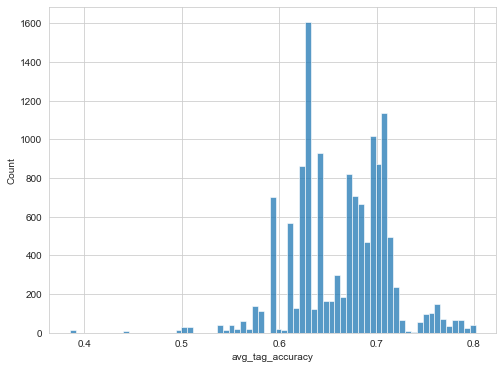

In [22]:
sns.histplot(question_features["avg_tag_accuracy"])

<AxesSubplot:xlabel='max_tag_accuracy', ylabel='Count'>

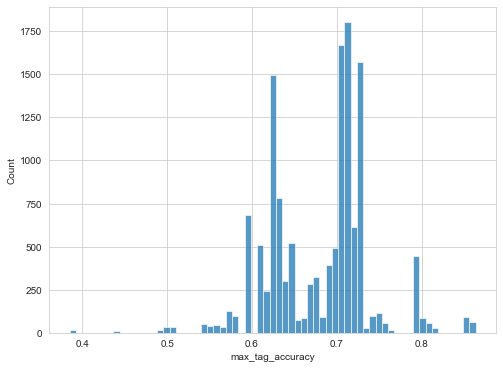

In [26]:
sns.histplot(question_features["max_tag_accuracy"])

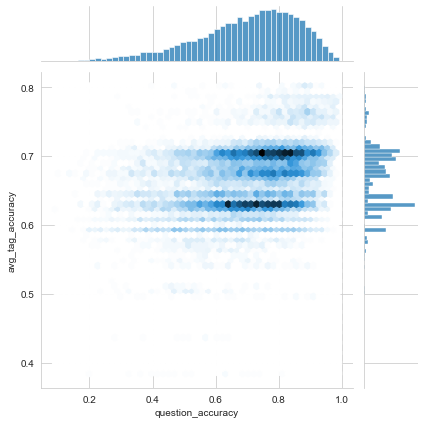

In [40]:
sns.jointplot(data=question_features, x="question_accuracy", y="avg_tag_accuracy", kind="hex")

<AxesSubplot:xlabel='diff_question_avg_tag', ylabel='Count'>

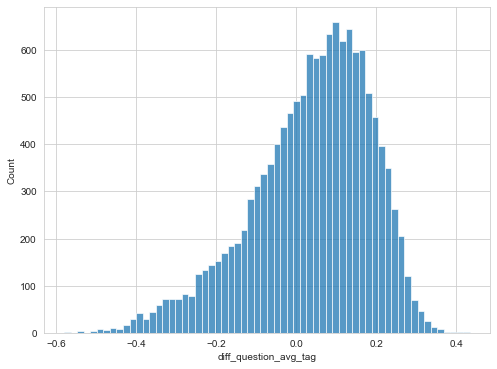

In [25]:
sns.histplot(question_features['diff_question_avg_tag'])

#### User answer history features

<AxesSubplot:xlabel='cum_accuracy', ylabel='Count'>

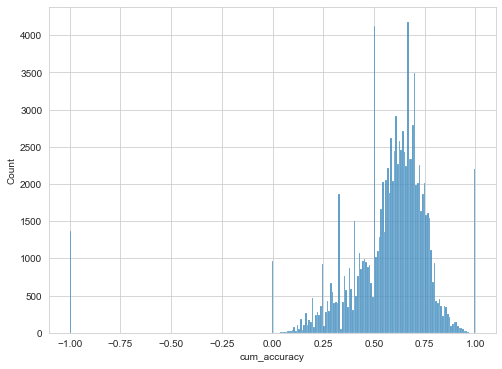

In [31]:
sns.histplot(val_df['cum_accuracy'])

<AxesSubplot:xlabel='cum_avg_score', ylabel='Count'>

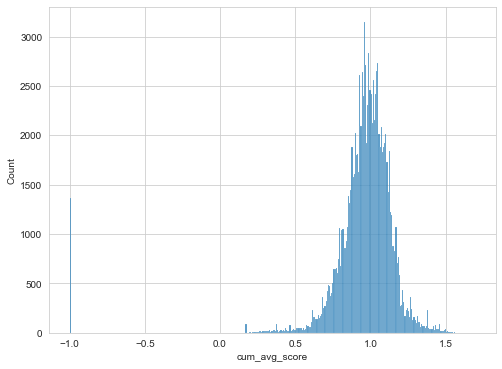

In [34]:
sns.histplot(val_df['cum_avg_score'])

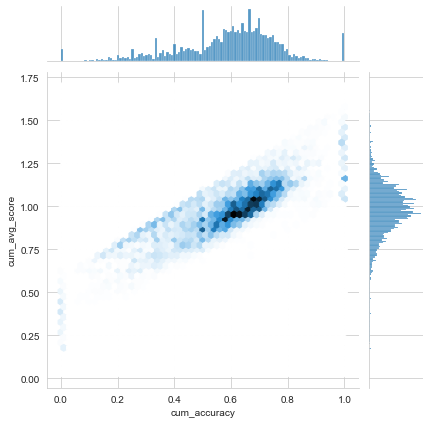

In [37]:
sns.jointplot(data=val_df.loc[val_df['cum_accuracy'] != -1], x="cum_accuracy", y="cum_avg_score", kind="hex")

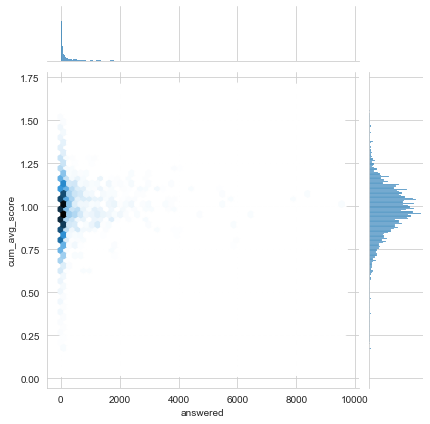

In [38]:
sns.jointplot(data=val_df.loc[val_df['cum_avg_score'] != -1], x="answered", y="cum_avg_score", kind="hex")

<AxesSubplot:xlabel='recent_avg_score', ylabel='Count'>

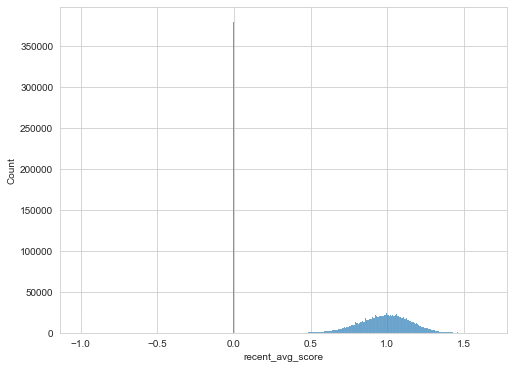

In [32]:
sns.histplot(val_df['recent_avg_score'])

<AxesSubplot:xlabel='trend_avg_score', ylabel='Count'>

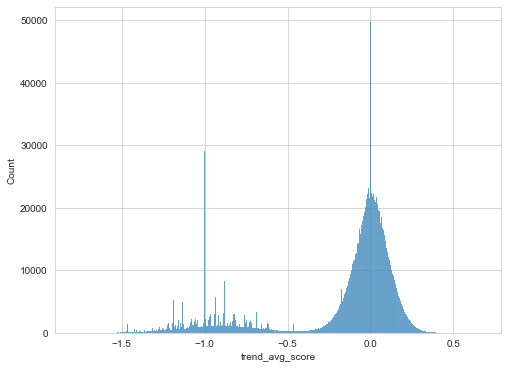

In [33]:
sns.histplot(val_df['trend_avg_score'])

NB: It seems the way we're imputing NaNs for `trend_avg_score` is problematic.